# Sprint 16: Web scraping

#### Imports

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Level 1

### Exercise 1

#### Web scraping of the Madrid stock exchange with BeautifulSoup and Selenium

### BeautifulSoup

Tool for pulling out information from a webpage. Extracting tables, lists, paragraphs from single url. Perfect for small projects.

In [2]:
#scrape html content
url = "https://www.bolsamadrid.es"
page = requests.get(url)
print(page.text)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head data-idioma="esp" data-hora-act="Thu, 18 Nov 2021 08:38:57 GMT" data-app-path="/" data-bolsa="BMadrid" data-analytics-id="UA-35966870-2"><meta http-equiv="X-UA-Compatible" content="IE=11" /><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta id="ctl00_copyright" name="copyright" content="Copyright © BME 2021" /><title>
	Bolsa de Madrid
</title><link id="ctl00_RSSLink1" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=Todo" title="Bolsa de Madrid: Todos los contenidos agregados" /><link id="ctl00_RSSLink2" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=NotasPrensa" title="Bolsa de Madrid: Notas de Prensa" /><link id="ctl00_RSSLink3" rel="alternate" type="application/rss+xml" href="/esp/aspx/RSS/RSS.ashx?feed=Regulacion" title="Bolsa de M

##### Playing around with BeautifulSoup

In [3]:
#parse html code with beautiful soup
soup = BeautifulSoup(page.content, "html.parser")

In [4]:
#find elements by ID
results = soup.find(id="PortBolsa")
print(results.prettify())

<div id="PortBolsa">
 <div class="coln1">
  <div class="CuadroSlides" style="width:250px;height:180px;">
   <div class="mclick" data-labelga="vídeo TC Día Edu. Financiera BM 04/10/2021" data-slidetiempo="20000" data-valuega="1">
    <a href="https://youtu.be/lzIVRMtoJQg" target="_blank">
     <div align="center">
      <img border="0" src="/aspx/Imagen.ashx?num=6019"/>
     </div>
    </a>
   </div>
   <div class="mclick" data-labelga="img Pro" data-slidetiempo="15000" data-valuega="1" style="display:none;">
    <a href="https://www.bolsasymercados.es/esp/Estudios-Publicaciones/Documento/5479_La_inversi%C3%B3n_de_las_familias_en_la_Bolsa_espa%C3%B1ola_sube_hasta_el_17_1__tras_cinco_a%C3%B1os_de_descensos" target="_blank">
     <div align="center">
      <img border="0" src="/aspx/Imagen.ashx?num=5988"/>
     </div>
    </a>
   </div>
   <div class="mclick" data-labelga="video home TC Squirrel BM 30oct2021" data-slidetiempo="25000" data-valuega="1" style="display:none;">
    <a href="ht

In [5]:
#find elements by class
column = results.find_all("div", class_="coln1")
for coln1 in column:
    print(coln1, end="\n"*2)

<div class="coln1"><div class="CuadroSlides" style="width:250px;height:180px;"><div class="mclick" data-labelga="vídeo TC Día Edu. Financiera BM 04/10/2021" data-slidetiempo="20000" data-valuega="1"><a href="https://youtu.be/lzIVRMtoJQg" target="_blank"><div align="center"><img border="0" src="/aspx/Imagen.ashx?num=6019"/></div></a></div><div class="mclick" data-labelga="img Pro" data-slidetiempo="15000" data-valuega="1" style="display:none;"><a href="https://www.bolsasymercados.es/esp/Estudios-Publicaciones/Documento/5479_La_inversi%C3%B3n_de_las_familias_en_la_Bolsa_espa%C3%B1ola_sube_hasta_el_17_1__tras_cinco_a%C3%B1os_de_descensos" target="_blank"><div align="center"><img border="0" src="/aspx/Imagen.ashx?num=5988"/></div></a></div><div class="mclick" data-labelga="video home TC Squirrel BM 30oct2021" data-slidetiempo="25000" data-valuega="1" style="display:none;"><a href="https://www.youtube.com/watch?v=_dEHbVVm3hw" target="_blank"><div align="center"><img border="0" src="/aspx/Im

In [6]:
#pick out child elements
for coln1 in column:
    element1 = coln1.findAll("div", class_="mclick")
    print(element1)

[<div class="mclick" data-labelga="vídeo TC Día Edu. Financiera BM 04/10/2021" data-slidetiempo="20000" data-valuega="1"><a href="https://youtu.be/lzIVRMtoJQg" target="_blank"><div align="center"><img border="0" src="/aspx/Imagen.ashx?num=6019"/></div></a></div>, <div class="mclick" data-labelga="img Pro" data-slidetiempo="15000" data-valuega="1" style="display:none;"><a href="https://www.bolsasymercados.es/esp/Estudios-Publicaciones/Documento/5479_La_inversi%C3%B3n_de_las_familias_en_la_Bolsa_espa%C3%B1ola_sube_hasta_el_17_1__tras_cinco_a%C3%B1os_de_descensos" target="_blank"><div align="center"><img border="0" src="/aspx/Imagen.ashx?num=5988"/></div></a></div>, <div class="mclick" data-labelga="video home TC Squirrel BM 30oct2021" data-slidetiempo="25000" data-valuega="1" style="display:none;"><a href="https://www.youtube.com/watch?v=_dEHbVVm3hw" target="_blank"><div align="center"><img border="0" src="/aspx/Imagen.ashx?num=6017"/></div></a></div>, <div class="mclick" data-slidetiemp

In [7]:
#find child div element
for x in element1:
    element2 = x.find("div")
print(element2)    

<div style="font-size: 12px; color: #00325D; font-weight: bold; text-align: Left; margin: 0px 0px 7px 0px">Los índices bursátiles como referencia en tiempos de crisis</div>


In [8]:
#print out just text
print(element2.text)

Los índices bursátiles como referencia en tiempos de crisis


In [9]:
#find elements by class name and text content
#find all elements with text crisis
crisis = results.find_all("div", string=lambda text: "crisis")
print(crisis)

[<div class="coln1"><div class="CuadroSlides" style="width:250px;height:180px;"><div class="mclick" data-labelga="vídeo TC Día Edu. Financiera BM 04/10/2021" data-slidetiempo="20000" data-valuega="1"><a href="https://youtu.be/lzIVRMtoJQg" target="_blank"><div align="center"><img border="0" src="/aspx/Imagen.ashx?num=6019"/></div></a></div><div class="mclick" data-labelga="img Pro" data-slidetiempo="15000" data-valuega="1" style="display:none;"><a href="https://www.bolsasymercados.es/esp/Estudios-Publicaciones/Documento/5479_La_inversi%C3%B3n_de_las_familias_en_la_Bolsa_espa%C3%B1ola_sube_hasta_el_17_1__tras_cinco_a%C3%B1os_de_descensos" target="_blank"><div align="center"><img border="0" src="/aspx/Imagen.ashx?num=5988"/></div></a></div><div class="mclick" data-labelga="video home TC Squirrel BM 30oct2021" data-slidetiempo="25000" data-valuega="1" style="display:none;"><a href="https://www.youtube.com/watch?v=_dEHbVVm3hw" target="_blank"><div align="center"><img border="0" src="/aspx/I

In [10]:
#how many maching jobs we have?
print(len(crisis))

78


In [11]:
#fetching url elements
urls = []

for w in crisis:
    links = w.find_all("a")
    for link in links:
        urls.append(link.get('href'))
        link_url = link["href"] 
        print(f"URL: {link_url}\n") 

URL: https://youtu.be/lzIVRMtoJQg

URL: https://www.bolsasymercados.es/esp/Estudios-Publicaciones/Documento/5479_La_inversi%C3%B3n_de_las_familias_en_la_Bolsa_espa%C3%B1ola_sube_hasta_el_17_1__tras_cinco_a%C3%B1os_de_descensos

URL: https://www.youtube.com/watch?v=_dEHbVVm3hw

URL: https://paisajedelaluz.es/

URL: https://www.bolsamadrid.es/esp/BMadrid/Palacio/VisitaVirtual.aspx

URL: https://www.bolsasymercados.es/esp/Estudios-Publicaciones/Documento/5416__C%C3%B3mo_hacer_las_bolsas_m%C3%A1s_atractivas_para_las_empresas_

URL: https://www.youtube.com/watch?v=hy0X1t53zWQ

URL: javascript:sacaVentana('https://www.bolsasymercados.es/esp/Sala-Comunicacion/Documento-Interes/20200505/Art%C3%ADculo_Indices_Crisis%5b6%5d.pdf/Los_indices_bursatiles_como_referencia_en_tiempos_de_crisis')

URL: javascript:NotaPrensa("esp","notas","20211004","nota_20211004_1")

URL: https://www.bolsasymercados.es/esp/Estudios-Publicaciones/Documento/5479_La_inversi%C3%B3n_de_las_familias_en_la_Bolsa_espa%C3%B1ola

In [12]:
urls[:2]

['https://youtu.be/lzIVRMtoJQg',
 'https://www.bolsasymercados.es/esp/Estudios-Publicaciones/Documento/5479_La_inversi%C3%B3n_de_las_familias_en_la_Bolsa_espa%C3%B1ola_sube_hasta_el_17_1__tras_cinco_a%C3%B1os_de_descensos']

##### Search for Indices Summary

In [13]:
link = soup.find('a', string='Resumen de Índices')
new_url = link.get('href')
new_url

'/esp/aspx/Indices/Resumen.aspx'

In [14]:
link = url+new_url
link

'https://www.bolsamadrid.es/esp/aspx/Indices/Resumen.aspx'

In [15]:
html_indices = requests.get(link)
soup_indices = BeautifulSoup(html_indices.content, 'html.parser')

In [16]:
table_indices = soup_indices.find("table",class_="TblPort")
table_indices.find_all("th")

[<th scope="col">Nombre</th>,
 <th scope="col">Anterior</th>,
 <th scope="col">Último</th>,
 <th scope="col">% Dif.</th>,
 <th scope="col">Máximo</th>,
 <th scope="col">Mínimo</th>,
 <th scope="col">Fecha</th>,
 <th scope="col">Hora</th>,
 <th class="Ult" scope="col">% Dif.<br/>Año 2021</th>]

In [17]:
columns=[]
for element in table_indices.find_all("th"):
    columns.append(element.get_text())
print(columns)

['Nombre', 'Anterior', 'Último', '% Dif.', 'Máximo', 'Mínimo', 'Fecha', 'Hora', '% Dif.Año 2021']


In [18]:
results=[]
for element in table_indices.find_all("td"):
    results.append(element.get_text())
print(results)

['IBEX 35®', '9.040,20', '8.993,40', '-0,52', '9.046,30', '8.993,40', '17/11/2021', '17:38:00', '11,39', 'IBEX 35® con Dividendos', '27.796,50', '27.652,70', '-0,52', '27.815,50', '27.652,70', '17/11/2021', '17:38:00', '13,98', 'IBEX MEDIUM CAP®', '13.719,40', '13.619,70', '-0,73', '13.736,60', '13.619,70', '17/11/2021', '17:38:00', '7,11', 'IBEX SMALL CAP®', '8.524,40', '8.501,20', '-0,27', '8.557,90', '8.484,20', '17/11/2021', '17:38:00', '4,98', 'IBEX 35® Bancos', '502,40', '499,30', '-0,62', '504,40', '499,30', '17/11/2021', '17:38:00', '32,76', 'IBEX 35® Energía', '1.314,30', '1.314,80', '0,04', '1.318,00', '1.309,90', '17/11/2021', '17:38:00', '1,50', 'IBEX 35® Construcción', '1.551,90', '1.540,40', '-0,74', '1.558,70', '1.539,50', '17/11/2021', '17:38:00', '9,22', 'IBEX TOP Dividendo®', '2.526,90', '2.517,50', '-0,37', '2.528,50', '2.511,80', '17/11/2021', '17:38:00', '15,80', 'IBEX 35® con Dividendos Netos', '23.248,50', '23.128,20', '-0,52', '23.264,40', '23.128,20', '17/11/20

In [19]:
data = {}
for i in range(9):
    data[columns[i]]=results[i::9]

df = pd.DataFrame(data)

In [20]:
df

,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif.Año 2021
0,IBEX 35®,"9.040,20","8.993,40","-0,52","9.046,30","8.993,40",17/11/2021,17:38:00,"11,39"
1,IBEX 35® con Dividendos,"27.796,50","27.652,70","-0,52","27.815,50","27.652,70",17/11/2021,17:38:00,"13,98"
2,IBEX MEDIUM CAP®,"13.719,40","13.619,70","-0,73","13.736,60","13.619,70",17/11/2021,17:38:00,"7,11"
3,IBEX SMALL CAP®,"8.524,40","8.501,20","-0,27","8.557,90","8.484,20",17/11/2021,17:38:00,"4,98"
4,IBEX 35® Bancos,"502,40","499,30","-0,62","504,40","499,30",17/11/2021,17:38:00,"32,76"
...,...,...,...,...,...,...,...,...,...
73,Índice ITX Inverso X3,"162,40","165,10","1,66","168,30","161,60",17/11/2021,17:38:00,"-67,74"
74,Índice TEF Inverso X5,"13,70","13,40","-2,19","14,10","13,30",17/11/2021,17:38:00,"-90,98"
75,Índice SAN Inverso X5,"3.257,60","3.300,60","1,32","3.325,90","3.161,00",17/11/2021,17:38:00,"163,00"
76,Índice BBVA Inverso X5,"5.553,10","5.773,50","3,97","5.787,90","5.481,40",17/11/2021,17:38:00,"285,74"


In [21]:
df.to_csv('Indices.csv')

### Selenium

Tool for pulling out information from a webpage. Simulates a real browser and reads also JavaScript. Testing of web applications and midium sized projects.

In [22]:
from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By 

opts = Options()
#operating in headless mode
opts.headless = True
browser = Firefox(options=opts)
browser.get('https://www.bolsamadrid.es')

In [23]:
#query the DOM - Document Object Model
#fetching elements in table IBEX35
ibex35 = browser.find_element(By.CLASS_NAME, "TblAccPort")
print(ibex35.text)

Nombre Último % Dif.  
ACCIONA 160,9000 -0,68
ACERINOX 10,7000 -0,56
ACS 22,8500 -1,17
AENA 143,2500 -1,82
ALMIRALL 11,2700 0,90


In [24]:
#fetching elements in table Daily schedule
schedule = browser.find_element(By.CLASS_NAME, "TblPort")
print(schedule.text)

Evento/Indicador País Periodo Anterior Previsto Actual
Balanza comercial  Suiza Octubre
Producción Industrial  Suiza Tercer Trimestre
Subasta de bonos  España Noviembre
Peticiones semanales de desempleo  EEUU Noviembre
Fed Philadelphia  EEUU Noviembre
Subasta de obligaciones  España Noviembre


In [25]:
#search for link to dividents
links = browser.find_element(By.LINK_TEXT, "Dividendos")
links.click()

In [26]:
#search for id of table
table = browser.find_element(By.ID, "ctl00_Contenido_tblDatos")

In [27]:
print(table.text)

Fecha
Descuento Fecha
Abono Emisora Valor ISIN Valor Ejercicio Tipo Importe Bruto
17/12/2021 29/12/2021 BRADESPAR,S.A. BRADESPAR ORDINARIAS BRBRAPACNOR5 A cuenta 2021 Ord. (*)
17/12/2021 29/12/2021 BRADESPAR,S.A. BRADESPAR PREFERENTES BRBRAPACNPR2 A cuenta 2021 Ord. (*)
26/11/2021 30/11/2021 MAPFRE, S.A. MAPFRE, S.A. ES0124244E34 A cuenta 2021 Ord. (*)
23/11/2021 25/11/2021 ARRIENDA RENTAL PROPERTIES SOCIMI,S.A. ARRIENDA RENTAL ES0105383006 A cuenta 2021 Ord. (*)
22/11/2021 24/11/2021 BEGOINVEST DE INVERSIONES,SICAV,S.A. BEGOINVEST DE INVERSIONES ES0114427034 RESERVAS 2021 Ord. (*)
19/11/2021 03/12/2021 MERLIN PROPERTIES, SOCIMI, S.A. MERLIN PROPERTIES ES0105025003 A cuenta 2021 Ord. (*)
11/11/2021 15/11/2021 RENTA CORPORACION REAL ESTATE, S.A. RENTA CORPORACION ES0173365018 A cuenta 2021 Ord. 0,0373
10/11/2021 12/11/2021 ALANTRA PARTNERS, S.A. ALANTRA PARTNERS ES0126501131 A cuenta 2021 Ord. (*)
09/11/2021 11/11/2021 PREVISION SANITARIA NACIONAL GEST. S.A. PREVISION SANITARIA NACIONAL

In [28]:
columns=[]

for element in table.find_elements(By.TAG_NAME, "th"):    
    columns.append(element.text)
    
print(columns)

['Fecha\nDescuento', 'Fecha\nAbono', 'Emisora', 'Valor', 'ISIN Valor', 'Ejercicio', 'Tipo', 'Importe Bruto']


In [29]:
results=[]

for element in table.find_elements(By.TAG_NAME, "td"):    
    results.append(element.text)

print(results)

['17/12/2021', '29/12/2021', 'BRADESPAR,S.A.', 'BRADESPAR ORDINARIAS', 'BRBRAPACNOR5', 'A cuenta 2021', 'Ord.', '(*)', '17/12/2021', '29/12/2021', 'BRADESPAR,S.A.', 'BRADESPAR PREFERENTES', 'BRBRAPACNPR2', 'A cuenta 2021', 'Ord.', '(*)', '26/11/2021', '30/11/2021', 'MAPFRE, S.A.', 'MAPFRE, S.A.', 'ES0124244E34', 'A cuenta 2021', 'Ord.', '(*)', '23/11/2021', '25/11/2021', 'ARRIENDA RENTAL PROPERTIES SOCIMI,S.A.', 'ARRIENDA RENTAL', 'ES0105383006', 'A cuenta 2021', 'Ord.', '(*)', '22/11/2021', '24/11/2021', 'BEGOINVEST DE INVERSIONES,SICAV,S.A.', 'BEGOINVEST DE INVERSIONES', 'ES0114427034', 'RESERVAS 2021', 'Ord.', '(*)', '19/11/2021', '03/12/2021', 'MERLIN PROPERTIES, SOCIMI, S.A.', 'MERLIN PROPERTIES', 'ES0105025003', 'A cuenta 2021', 'Ord.', '(*)', '11/11/2021', '15/11/2021', 'RENTA CORPORACION REAL ESTATE, S.A.', 'RENTA CORPORACION', 'ES0173365018', 'A cuenta 2021', 'Ord.', '0,0373', '10/11/2021', '12/11/2021', 'ALANTRA PARTNERS, S.A.', 'ALANTRA PARTNERS', 'ES0126501131', 'A cuenta 2

In [30]:
data = {}
for i in range(8):
    data[columns[i]]=results[i::8]

df = pd.DataFrame(data)

In [31]:
df

,Fecha\nDescuento,Fecha\nAbono,Emisora,Valor,ISIN Valor,Ejercicio,Tipo,Importe Bruto
0,17/12/2021,29/12/2021,"BRADESPAR,S.A.",BRADESPAR ORDINARIAS,BRBRAPACNOR5,A cuenta 2021,Ord.,(*)
1,17/12/2021,29/12/2021,"BRADESPAR,S.A.",BRADESPAR PREFERENTES,BRBRAPACNPR2,A cuenta 2021,Ord.,(*)
2,26/11/2021,30/11/2021,"MAPFRE, S.A.","MAPFRE, S.A.",ES0124244E34,A cuenta 2021,Ord.,(*)
3,23/11/2021,25/11/2021,"ARRIENDA RENTAL PROPERTIES SOCIMI,S.A.",ARRIENDA RENTAL,ES0105383006,A cuenta 2021,Ord.,(*)
4,22/11/2021,24/11/2021,"BEGOINVEST DE INVERSIONES,SICAV,S.A.",BEGOINVEST DE INVERSIONES,ES0114427034,RESERVAS 2021,Ord.,(*)
5,19/11/2021,03/12/2021,"MERLIN PROPERTIES, SOCIMI, S.A.",MERLIN PROPERTIES,ES0105025003,A cuenta 2021,Ord.,(*)
6,11/11/2021,15/11/2021,"RENTA CORPORACION REAL ESTATE, S.A.",RENTA CORPORACION,ES0173365018,A cuenta 2021,Ord.,"0,0373"
7,10/11/2021,12/11/2021,"ALANTRA PARTNERS, S.A.",ALANTRA PARTNERS,ES0126501131,A cuenta 2021,Ord.,(*)
8,09/11/2021,11/11/2021,PREVISION SANITARIA NACIONAL GEST. S.A.,PREVISION SANITARIA NACIONAL,ES0170756037,A cuenta 2021,Ord.,(*)
9,04/11/2021,08/11/2021,"AMERICA MOVIL S,A,B,",AMERICA MOVIL SERIE L,MXP001691213,A cuenta 2021,Ord.,(*)


In [32]:
df.to_csv('Dividents.csv')
browser.close()
quit()

## Level 2

### Exercise 2

#### Information about files from Kaggle in word document

Decsription of dataset:
https://github.com/dominikapetru/web_scraping/blob/main/Description.docx

### Dataset Indices Summary from Madrid Stock Exchange

#### Context

The dataset consists of set of price data for indices tracking stock exchanges from Spain. The data was all collected from Madrid Stock Exchange website 17.11.2021 at 9:50AM.

Prices are quoted in euros.

This dataset was created is a result of webscraping test and is designed to be a playground for pre-processing and technical analysis.

#### Content

Indices.csv: prices for indices tracking stock exchanges

The categories of this dataset: 
- Nombre - Name of inex
- Anterior - Previous price
- Último - Previous price
- % Dif. - Difference of prices in %
- Máximo - High
- Mínimo - Low
- Fecha - Date
- Hora - Hour
- % Dif.Año 2021 - Difference of prices for 2021 in %

#### Acknowledgements

- Source: https://www.bolsamadrid.es
- Github: https://github.com/dominikapetru/web_scraping

In [4]:
df = pd.read_csv('Indices.csv')
df.head(5)

,Unnamed: 0,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif.Año 2021
0,0,IBEX 35®,"9.040,20","8.993,40","-0,52","9.046,30","8.993,40",17/11/2021,17:38:00,"11,39"
1,1,IBEX 35® con Dividendos,"27.796,50","27.652,70","-0,52","27.815,50","27.652,70",17/11/2021,17:38:00,"13,98"
2,2,IBEX MEDIUM CAP®,"13.719,40","13.619,70","-0,73","13.736,60","13.619,70",17/11/2021,17:38:00,"7,11"
3,3,IBEX SMALL CAP®,"8.524,40","8.501,20","-0,27","8.557,90","8.484,20",17/11/2021,17:38:00,"4,98"
4,4,IBEX 35® Bancos,"502,40","499,30","-0,62","504,40","499,30",17/11/2021,17:38:00,"32,76"


In [34]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nombre          78 non-null     object
 1   Anterior        78 non-null     object
 2   Último          78 non-null     object
 3   % Dif.          78 non-null     object
 4   Máximo          78 non-null     object
 5   Mínimo          78 non-null     object
 6   Fecha           78 non-null     object
 7   Hora            78 non-null     object
 8   % Dif.Año 2021  78 non-null     object
dtypes: object(9)
memory usage: 5.6+ KB


In [36]:
df['Anterior'] = df['Anterior'].str.replace('.','').str.replace(',','.').astype(float)
df['Último'] = df['Último'].str.replace('.','').str.replace(',','.').astype(float)
df['% Dif.'] = df['% Dif.'].str.replace(',','.')
df['Máximo'] = df['Máximo'].str.replace('.','').str.replace(',','.').astype(float)
df['Mínimo'] = df['Mínimo'].str.replace('.','').str.replace(',','.').astype(float)
df['% Dif.Año 2021'] = df['% Dif.Año 2021'].str.replace(',','.')

df.head(5)

,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif.Año 2021
0,IBEX 35®,9040.2,8993.4,-0.52,9046.3,8993.4,17/11/2021,17:38:00,11.39
1,IBEX 35® con Dividendos,27796.5,27652.7,-0.52,27815.5,27652.7,17/11/2021,17:38:00,13.98
2,IBEX MEDIUM CAP®,13719.4,13619.7,-0.73,13736.6,13619.7,17/11/2021,17:38:00,7.11
3,IBEX SMALL CAP®,8524.4,8501.2,-0.27,8557.9,8484.2,17/11/2021,17:38:00,4.98
4,IBEX 35® Bancos,502.4,499.3,-0.62,504.4,499.3,17/11/2021,17:38:00,32.76


In [37]:
list = len(df)
list

78

In [38]:
#negative values - conversion to float
for i in range (list):
    df['% Dif.'] = df.at[i,'% Dif.'].replace('\U00002013', '-')
    df['% Dif.Año 2021'] = df.at[i,'% Dif.Año 2021'].replace('\U00002013', '-')

In [39]:
df['% Dif.'].astype(float)
df['% Dif.Año 2021'].astype(float)

df.head(5)

,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif.Año 2021
0,IBEX 35®,9040.2,8993.4,-0.52,9046.3,8993.4,17/11/2021,17:38:00,11.39
1,IBEX 35® con Dividendos,27796.5,27652.7,-0.52,27815.5,27652.7,17/11/2021,17:38:00,11.39
2,IBEX MEDIUM CAP®,13719.4,13619.7,-0.52,13736.6,13619.7,17/11/2021,17:38:00,11.39
3,IBEX SMALL CAP®,8524.4,8501.2,-0.52,8557.9,8484.2,17/11/2021,17:38:00,11.39
4,IBEX 35® Bancos,502.4,499.3,-0.52,504.4,499.3,17/11/2021,17:38:00,11.39


Clean dataset ready for data analysis.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nombre          78 non-null     object 
 1   Anterior        78 non-null     float64
 2   Último          78 non-null     float64
 3   % Dif.          78 non-null     object 
 4   Máximo          78 non-null     float64
 5   Mínimo          78 non-null     float64
 6   Fecha           78 non-null     object 
 7   Hora            78 non-null     object 
 8   % Dif.Año 2021  78 non-null     object 
dtypes: float64(4), object(5)
memory usage: 5.6+ KB


## Level 3

### Exercise 3

#### Web scraping of any webpage with Scrapy

In [1]:
import scrapy
from scrapy.crawler import CrawlerProcess
import emoji

In [2]:
#new spider class
class MySpider(scrapy.Spider):
    name = "spider"
    
    #define the urls for crawling
    def start_requests(self):
        urls = ['https://www.habitaclia.com/viviendas-en-girones.htm',
                'https://www.habitaclia.com/viviendas-en-girones-1.htm',
                'https://www.habitaclia.com/viviendas-en-girones-2.htm',
                'https://www.habitaclia.com/viviendas-en-girones-3.htm',
                'https://www.habitaclia.com/viviendas-en-girones-4.htm']
        for url in urls:
            yield scrapy.Request(url=url, callback=self.parse)
    
    #parsing the main div section with articles       
    def parse(self, response):
        articles1 = response.xpath('//div[@class="list-item-info"]')
        
        #extrecting values
        for element in articles1:
            title = element.xpath('.//h3/a/@title').extract_first()
            neighborhood = element.xpath('.//p/span/text()').extract_first()
            price = element.xpath('.//span[@class="font-2"]/text()').extract_first()
            url = element.xpath('.//h3/a/@href').extract_first()
            description = element.xpath('.//p[@class="list-item-description"]/text()').extract_first()  

            #hold data for later saving          
            yield {
                'title': title,
                'neighborhood': neighborhood,
                'price': price,
                'url': url,
                'description': description,
            }

#extract data to csv, also possible to use json 
FILE_NAME = 'data.csv'
SETTINGS = {
            'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)',
            'FEED_FORMAT': 'csv',
            'FEED_URI': FILE_NAME,
            'DOWNLOAD_DELAY': 1,
            } 

In [3]:
process = CrawlerProcess(SETTINGS)
process.crawl(MySpider) 
process.start()

2021-11-18 11:08:20 [scrapy.utils.log] INFO: Scrapy 2.5.1 started (bot: scrapybot)
2021-11-18 11:08:20 [scrapy.utils.log] INFO: Versions: lxml 4.6.3.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.7.0, Python 3.8.8 (default, Apr 13 2021, 12:59:45) - [Clang 10.0.0 ], pyOpenSSL 20.0.1 (OpenSSL 1.1.1l  24 Aug 2021), cryptography 3.4.7, Platform macOS-10.14.6-x86_64-i386-64bit
2021-11-18 11:08:20 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2021-11-18 11:08:21 [scrapy.crawler] INFO: Overridden settings:
{'DOWNLOAD_DELAY': 1,
 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2021-11-18 11:08:21 [scrapy.extensions.telnet] INFO: Telnet Password: 5e536f7263f2d608
2021-11-18 11:08:21 [py.warnings] WARNING: /Users/dominikapetru/opt/anaconda3/lib/python3.8/site-packages/scrapy/extensions/feedexport.py:247: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `

In [4]:
print(emoji.emojize('Hacking!!! :thumbs_up:'))

Hacking!!! 👍


In [5]:
import pandas as pd

df=pd.read_csv('data.csv')
df

,title,neighborhood,price,url,description
0,Piso Ford roig-montjuic. Piso con 3 habitacio...,Girona - Montjuïc,325.000 €,https://www.habitaclia.com/comprar-piso-con_3_...,Fantástico piso esquinero de 3 habitaciones y ...
1,Piso Emili grahit. Piso con 6 habitaciones co...,Girona - Eixample Nord,450.000 €,https://www.habitaclia.com/comprar-piso-con_6_...,Piso de 205m2 con Gran Potencial en medio del ...
2,Ático en Eixample Nord. Atico duplex exclusi...,Girona - Eixample Nord,999.000 €,https://www.habitaclia.com/comprar-atico-duple...,Atico dúplex exclusivo en el corazón de Girona...
3,Piso Jaume i. Piso con 5 habitaciones con asc...,Girona - Eixample Nord,395.000 €,https://www.habitaclia.com/comprar-piso-con_5_...,PISO DE GRANDES POSIBILIDADES EN EL CORAZÓN D...
4,Casa adosada en Palau. Oportunitat casa a pa...,Girona - Palau,525.000 €,https://www.habitaclia.com/comprar-casa_adosad...,Fantàstica casa a la zona de Palau de Girona. ...
...,...,...,...,...,...
75,Piso en Calle roger de llúria 8. Disfruta de...,Vilablareix,260.000 €,https://www.habitaclia.com/comprar-piso-disfru...,Buscas un piso con terraza? ¿Quieres vivir en ...
76,Casa en Bordils. Casa con 13 habitaciones co...,Bordils,1.195.000 €,https://www.habitaclia.com/comprar-casa-con_13...,Bienvenidos a esta maravillosa masía situada e...
77,Chalet en Llagostera,Llagostera,365.000 €,https://www.habitaclia.com/comprar-chalet-en-l...,Fantástica casa independiente de 366 m2 en una...
78,Piso Carrer de santa eugènia. Piso en santa e...,Girona - Santa Eugenia,95.000 €,https://www.habitaclia.com/comprar-piso-en_san...,"PISO EN SANTA EUGENIA ZONA MARISTES, dispone d..."


#### Girona housing for sale dataset
This dataset contains first 5 pages of Habitaclia posts about housing for sale in Girona city. It could be used for monitoring prices in specific neighborhood or analyzing average prices while thinking about selling or buying. Moreover, it might serve for answering these questions:
- Which is the neighborhood with highest offer of housing?
- Which is the most expensive neighborhood?
- What's the average size of housing on the market?

In [12]:
list = df['neighborhood'].unique()
list

array(['Girona - Montjuïc', 'Girona - Eixample Nord', 'Girona - Palau',
       'Girona - Eixample Sud-Migdia', 'Girona - Centre-Barri Vell',
       'Girona - Centre-Carme', 'Girona - La Devesa',
       'Girona - Fontajau-Domeny', 'Vilablareix', 'Neighborhood',
       'Girona - Santa Eugenia', 'Quart', 'Cassà de la Selva',
       'Fornells de la Selva', 'Girona - Montilivi', 'Salt - Veïnat',
       'Llagostera', 'Sant Gregori', 'Campllong', 'Salt - Centre',
       'Bordils', 'Girona - Sant Narcis'], dtype=object)

In [14]:
df_Eixample = df.loc[df['neighborhood'] == 'Girona - Eixample Sud-Migdia']
df_Montilivi = df.loc[df['neighborhood'] == 'Girona - Montilivi']
print(df_Eixample['title'].count(), df_Montilivi['title'].count())

14 7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         80 non-null     object
 1   neighborhood  80 non-null     object
 2   price         79 non-null     object
 3   url           80 non-null     object
 4   description   80 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [6]:
df['price'] = df['price'].str.replace('.','').str.replace(' €','').astype(float)
df.head()

,title,neighborhood,price,url,description
0,Piso Ford roig-montjuic. Piso con 3 habitacio...,Girona - Montjuïc,325000.0,https://www.habitaclia.com/comprar-piso-con_3_...,Fantástico piso esquinero de 3 habitaciones y ...
1,Piso Emili grahit. Piso con 6 habitaciones co...,Girona - Eixample Nord,450000.0,https://www.habitaclia.com/comprar-piso-con_6_...,Piso de 205m2 con Gran Potencial en medio del ...
2,Ático en Eixample Nord. Atico duplex exclusi...,Girona - Eixample Nord,999000.0,https://www.habitaclia.com/comprar-atico-duple...,Atico dúplex exclusivo en el corazón de Girona...
3,Piso Jaume i. Piso con 5 habitaciones con asc...,Girona - Eixample Nord,395000.0,https://www.habitaclia.com/comprar-piso-con_5_...,PISO DE GRANDES POSIBILIDADES EN EL CORAZÓN D...
4,Casa adosada en Palau. Oportunitat casa a pa...,Girona - Palau,525000.0,https://www.habitaclia.com/comprar-casa_adosad...,Fantàstica casa a la zona de Palau de Girona. ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         80 non-null     object 
 1   neighborhood  80 non-null     object 
 2   price         79 non-null     float64
 3   url           80 non-null     object 
 4   description   80 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.2+ KB


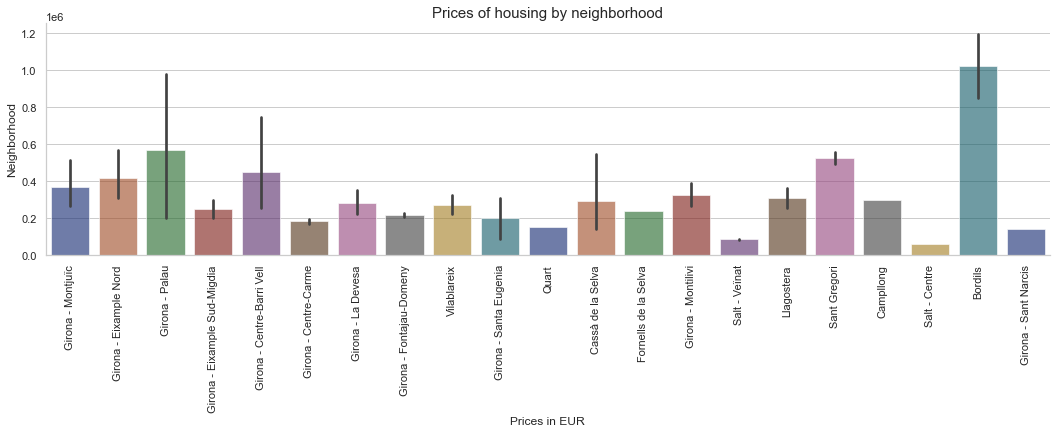

In [33]:
sns.set_theme(style="whitegrid")

sns.catplot(data=df, kind="bar",x="neighborhood", y="price",palette="dark", alpha=.6, height=4, aspect=15/4)
plt.xlabel("Neighborhood",fontsize=12)
plt.ylabel("Prices in EUR",fontsize=12)
plt.title("Prices of housing by neighborhood",fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### Notes
* Beautiful Soup
    - https://realpython.com/beautiful-soup-web-scraper-python/
* Selenium
    - https://realpython.com/modern-web-automation-with-python-and-selenium/
    - https://www.selenium.dev/documentation/es/getting_started/
    - https://scrapy.org
    - https://selenium-python.readthedocs.io/getting-started.html#simple-usage
* Avoid getting blocked
    - https://www.codementor.io/@scrapingdog/10-tips-to-avoid-getting-blocked-while-scraping-websites-16papipe62
* Comparision Beautiful Soup, Selenium, Scrapy  
    - https://medium.com/analytics-vidhya/scrapy-vs-selenium-vs-beautiful-soup-for-web-scraping-24008b6c87b8
* Scrapy
    - step by step https://letslearnabout.net/tutorial/scrapy-tutorial/python-scrapy-tutorial-for-beginners-01-creating-your-first-spider/
    - how to export https://stackoverflow.com/questions/47417332/scrapy-crawlerprocess-not-saving-data-with-crawlspider
    - tutorial https://www.tutorialspoint.com/scrapy/scrapy_overview.htm
    - selectors https://docs.scrapy.org/en/latest/topics/selectors.html
    - tutorial with books https://medium.com/quick-code/python-scrapy-tutorial-for-beginners-02-extract-all-the-data-aa0165501b4c
    - https://towardsdatascience.com/run-scrapy-code-from-jupyter-notebook-without-issues-69b7cb79530c
    - https://www.jitsejan.com/using-scrapy-in-jupyter-notebook
    - https://books.toscrape.com/